In [192]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier



In [193]:
data = pd.read_csv(r'D:\Programming👩‍💻\ML models\Cardiovascular disease prediction\cardio_train.csv', sep=';')

In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


# Dataset Description 
### There are 3 types of input features: 

#### Objective: factual information;
#### Examination: results of medical examination;
#### Subjective: information given by the patient.
### Features:

#### Age | Objective Feature | age | int (days)
#### Height | Objective Feature | height | int (cm) |
#### Weight | Objective Feature | weight | float (kg) |
#### Gender | Objective Feature | gender | categorical code |
#### Systolic blood pressure | Examination Feature | ap_hi | int |
#### Diastolic blood pressure | Examination Feature | ap_lo | int |
#### Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
#### Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
#### Smoking | Subjective Feature | smoke | binary |
#### Alcohol intake | Subjective Feature | alco | binary |
#### Physical activity | Subjective Feature | active | binary |
#### Presence or absence of cardiovascular disease | Target Variable | cardio | binary | 

In [195]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Data Preprocessing

In [196]:
data['age'].head()

0    18393
1    20228
2    18857
3    17623
4    17474
Name: age, dtype: int64

### Data Transformation: Converting feature "age" into usable format that is in years

In [197]:
data['age'] = data['age']//365

In [198]:
data['age'].head(10)

0    50
1    55
2    51
3    48
4    47
5    60
6    60
7    61
8    48
9    54
Name: age, dtype: int64

### Checking for Missing Values

In [199]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [200]:
data.duplicated().sum()

0

### Detecting & Handling Potential Outliers

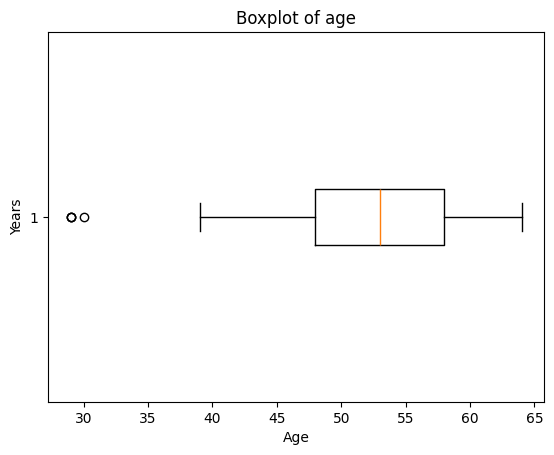

In [201]:
plt.boxplot(data['age'], vert=False)
plt.title('Boxplot of age')
plt.xlabel('Age')
plt.ylabel('Years')
plt.show()

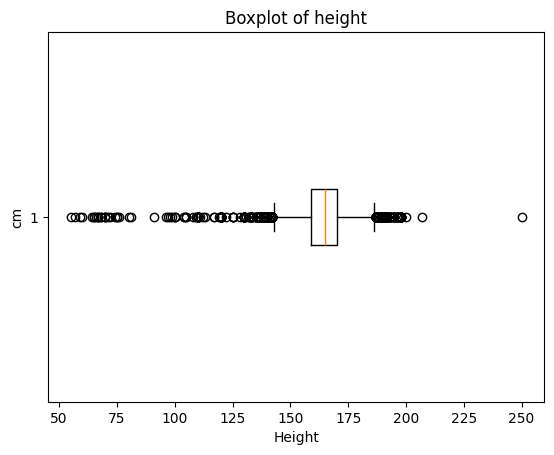

In [202]:
plt.boxplot(data['height'], vert=False)
plt.title('Boxplot of height')
plt.xlabel('Height')
plt.ylabel('cm')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1c19ad9d430>,
 'caps': [<matplotlib.lines.Line2D at 0x1c19ad07730>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c19ad9d6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c19ad07580>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c19ad07fd0>],
 'means': []}

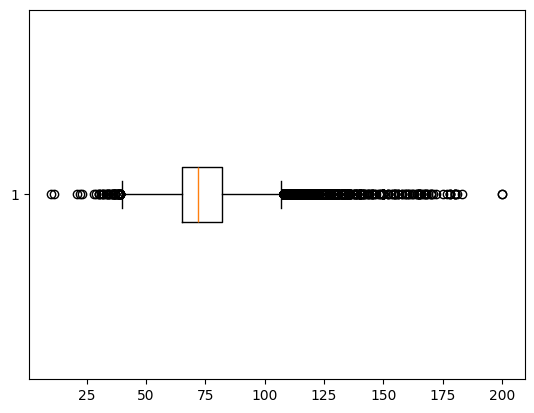

In [203]:
plt.boxplot(data['weight'], vert=False)

In [204]:
from scipy.stats import zscore
z_scores = zscore(data['weight'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
data = data[filtered_entries]


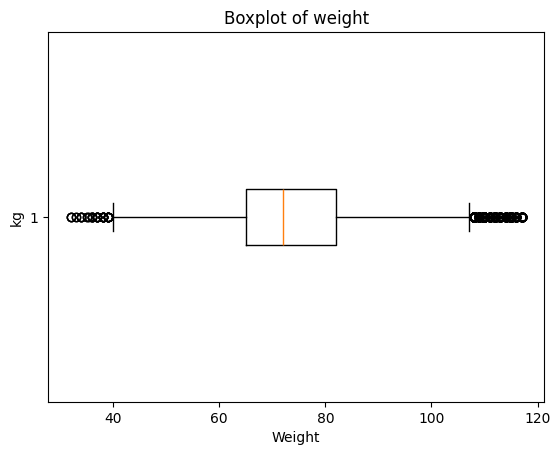

In [205]:
plt.boxplot(data['weight'], vert=False)
plt.title('Boxplot of weight')
plt.xlabel('Weight')
plt.ylabel('kg')
plt.show()


In [206]:
z_scores = zscore(data['height'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
data = data[filtered_entries]

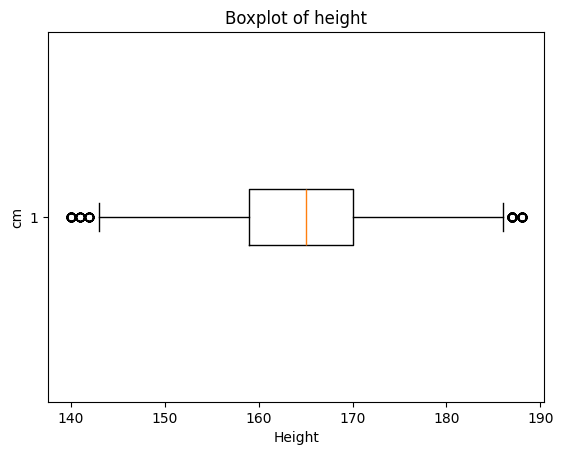

In [207]:
plt.boxplot(data['height'], vert=False)
plt.title('Boxplot of height')
plt.xlabel('Height')
plt.ylabel('cm')
plt.show()


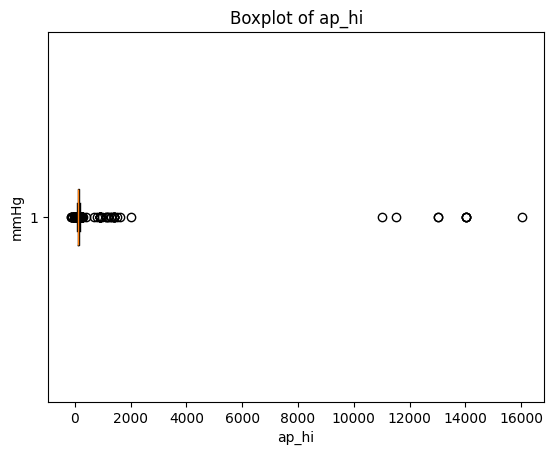

In [208]:
plt.boxplot(data['ap_hi'], vert=False)
plt.title('Boxplot of ap_hi')
plt.xlabel('ap_hi')
plt.ylabel('mmHg')
plt.show()

In [209]:
z_scores = zscore(data['ap_hi'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
data = data[filtered_entries]


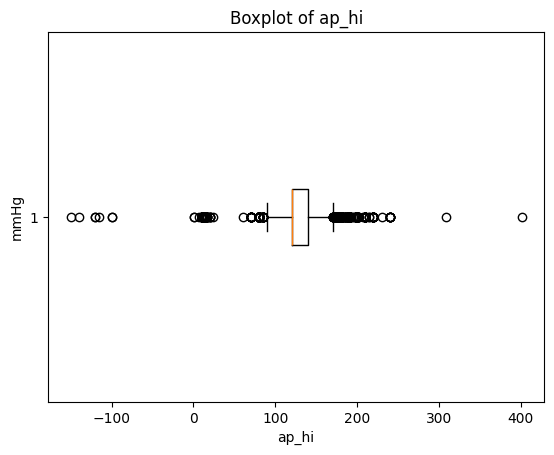

In [210]:
plt.boxplot(data['ap_hi'], vert=False)
plt.title('Boxplot of ap_hi')
plt.xlabel('ap_hi')
plt.ylabel('mmHg')
plt.show()

In [211]:
z_scores = zscore(data['ap_lo'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
data = data[filtered_entries]

In [212]:
max_values = data['ap_hi'].max()
data = data[data['ap_hi'] < max_values]

In [213]:
data = data[data['ap_hi'] >= 0]

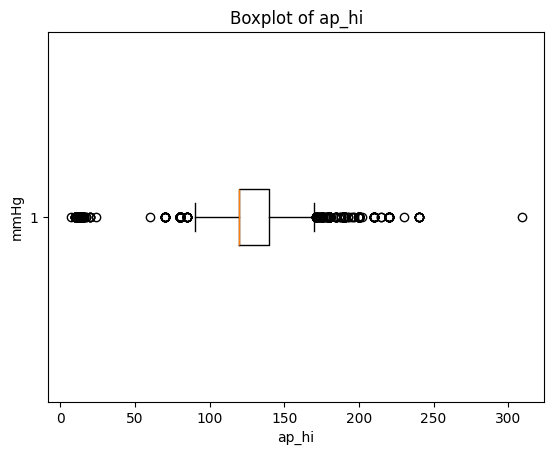

In [214]:
plt.boxplot(data['ap_hi'], vert=False)
plt.title('Boxplot of ap_hi')
plt.xlabel('ap_hi')
plt.ylabel('mmHg')
plt.show()

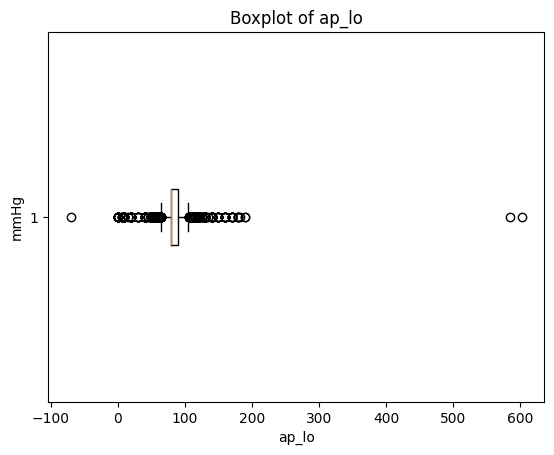

In [215]:
plt.boxplot(data['ap_lo'], vert=False)
plt.title('Boxplot of ap_lo')
plt.xlabel('ap_lo')
plt.ylabel('mmHg')
plt.show()

In [216]:
z_scores = zscore(data['ap_lo'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
data = data[filtered_entries]

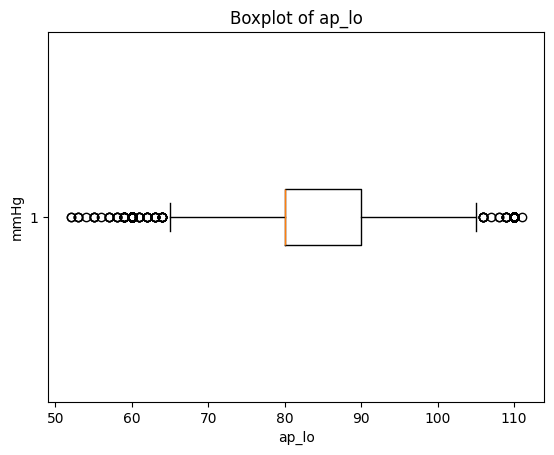

In [217]:
plt.boxplot(data['ap_lo'], vert=False)
plt.title('Boxplot of ap_lo')
plt.xlabel('ap_lo')
plt.ylabel('mmHg')
plt.show()

In [218]:
data = data.drop(['id'], axis=1)

In [219]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,67626.0,52.833688,6.768994,29.0,48.0,53.0,58.0,64.0
gender,67626.0,1.347026,0.476028,1.0,1.0,1.0,2.0,2.0
height,67626.0,164.378153,7.686314,140.0,159.0,165.0,170.0,188.0
weight,67626.0,73.547936,13.182362,32.0,65.0,72.0,81.0,117.0
ap_hi,67626.0,126.103777,17.202779,7.0,120.0,120.0,140.0,240.0
ap_lo,67626.0,81.152841,9.045422,52.0,80.0,80.0,90.0,111.0
cholesterol,67626.0,1.360778,0.676161,1.0,1.0,1.0,1.0,3.0
gluc,67626.0,1.222843,0.568784,1.0,1.0,1.0,1.0,3.0
smoke,67626.0,0.087126,0.282022,0.0,0.0,0.0,0.0,1.0
alco,67626.0,0.052805,0.223646,0.0,0.0,0.0,0.0,1.0


### Correlation HeatMap: To Identify & Understand the relationship between the Input Features and Target Variable (Cardio)

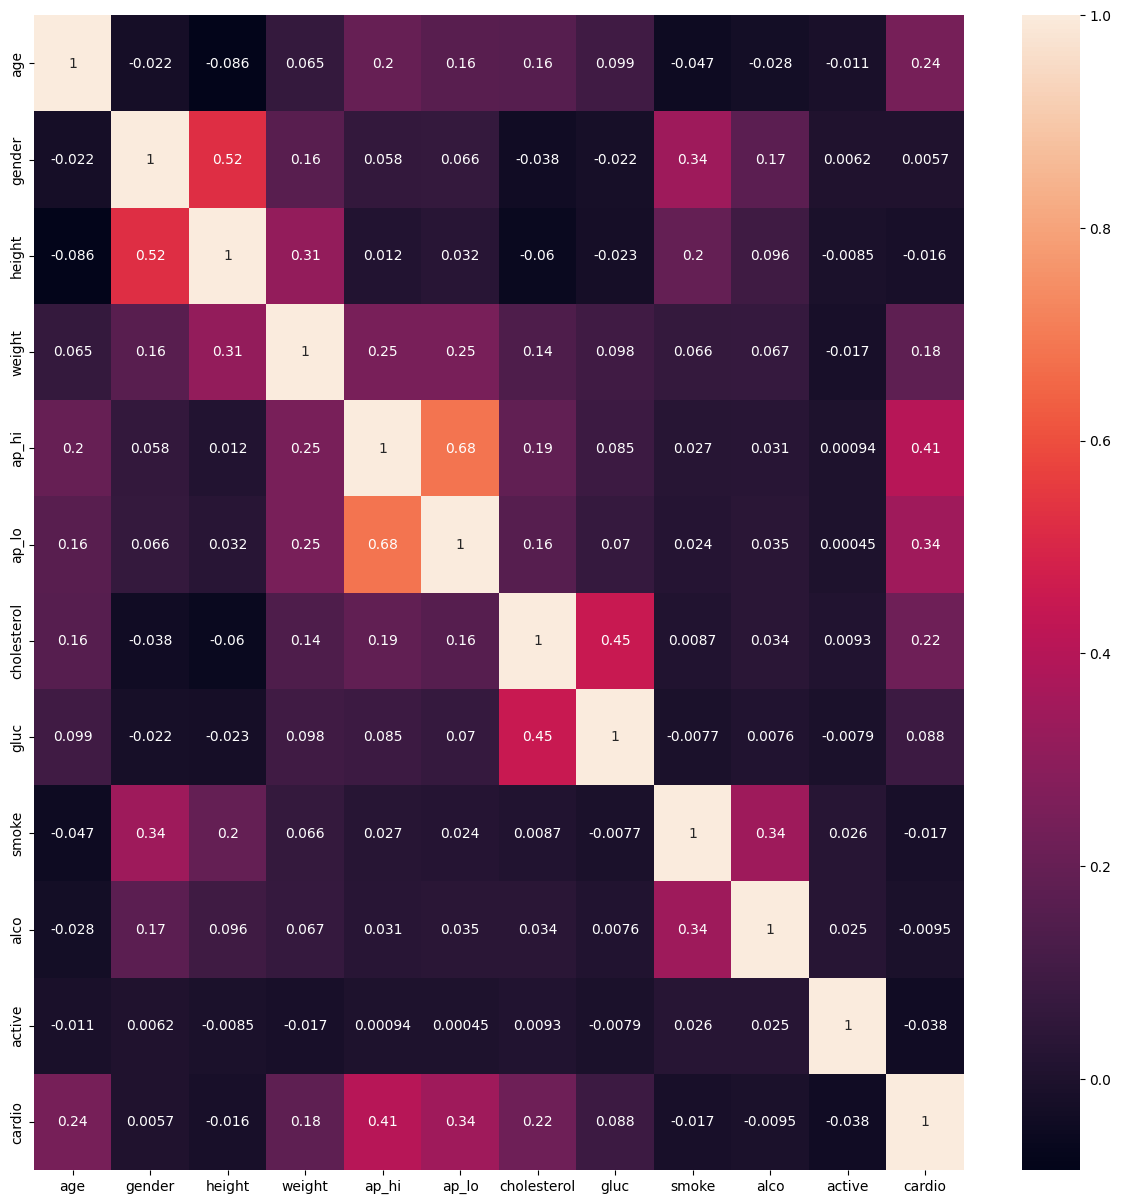

In [220]:
corr = data.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True)
plt.show()


## Splitting & Normalizing of the Data

In [221]:
X = data.drop(['cardio'], axis=1)
y = data['cardio']

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [223]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling & Evaluation

In [224]:
model = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=1,criterion='entropy')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.734880969983735

In [225]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7307407955049534

In [226]:
model = SVC(random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7368771255360047

In [231]:
model = KNeighborsClassifier(n_neighbors=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7117403519148306

## Results and Discussion 
#### We evaluated four machine learning models for cardiovascular disease detection: RandomForest, Logistic Regression, SVC, and K-Nearest Neighbors (KNN).
### Model Performance:
#### 1. *RandomForest (RF):* Robust performance (73.49%), excelling in capturing complex relationships.
#### 2. *Logistic Regression (LR):* Competitive accuracy (73.07%) for a simpler linear model.
#### 3. *SVC:* Proficient (73.69%) in handling intricate decision boundaries.
#### 4. *KNN:* Reasonable performance (71.17%) but sensitive to outliers in high-dimensional spaces.


### Discussion:
#### - Ensemble vs. Linear Models: Random forest outperforms Logistic Regression, emphasizing the importance of ensemble methods for complex tasks like disease prediction.

#### - Complexity and Flexibility: SVC's flexibility is highlighted, but computational costs should be considered.

#### - Nearest Neighbors Approach:  KNN provides reasonable accuracy but may be limited in high-dimensional datasets.

### Conclusion:
#### RandomForest (73.49%) is recommended for cardiovascular disease prediction due to its robust performance in capturing complex patterns.
